In [67]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import json
from pandas.io.json import json_normalize
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os

Loading data for analysis from Google Analytics sessions data.

In [68]:
df = pd.read_csv("D:/DS/analysis/GA analysis/ga_traffic_one_month_000000000000.csv")

# import glob
# df = pd.concat(map(pd.read_csv, glob.glob('D:/DS/analysis/GA analysis/*.csv')))

In [69]:
print(df.shape)

(977640, 47)


In [70]:
print(df.columns)

Index(['clientId', 'date', 'visitStartTime', 'channelGrouping',
       'socialEngagementType', 'browser', 'browserVersion', 'browserSize',
       'operatingSystem', 'operatingSystemVersion', 'isMobile',
       'mobileDeviceBranding', 'mobileDeviceModel', 'mobileInputSelector',
       'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion',
       'javaEnabled', 'language', 'screenColors', 'screenResolution',
       'deviceCategory', 'continent', 'subContinent', 'country', 'region',
       'metro', 'city', 'cityId', 'networkDomain', 'latitude', 'longitude',
       'networkLocation', 'referralPath', 'campaign', 'medium', 'keyword',
       'referer', 'hit_type', 'pagePath', 'pageTitle', 'searchKeyword',
       'searchCategory', 'eventCategory', 'eventAction', 'eventLabel',
       'eventValue'],
      dtype='object')


In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977640 entries, 0 to 977639
Data columns (total 47 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   clientId                   977640 non-null  object 
 1   date                       977640 non-null  int64  
 2   visitStartTime             977640 non-null  int64  
 3   channelGrouping            977640 non-null  object 
 4   socialEngagementType       977640 non-null  object 
 5   browser                    977640 non-null  object 
 6   browserVersion             977640 non-null  object 
 7   browserSize                977640 non-null  object 
 8   operatingSystem            977640 non-null  object 
 9   operatingSystemVersion     977640 non-null  object 
 10  isMobile                   977640 non-null  bool   
 11  mobileDeviceBranding       639507 non-null  object 
 12  mobileDeviceModel          639507 non-null  object 
 13  mobileInputSelector        63

In [72]:
pd.set_option('display.max_columns', None)
df.head()

,clientId,date,visitStartTime,channelGrouping,socialEngagementType,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,javaEnabled,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,referralPath,campaign,medium,keyword,referer,hit_type,pagePath,pageTitle,searchKeyword,searchCategory,eventCategory,eventAction,eventLabel,eventValue
0,583036282.16,20211118,1637227116,Direct,Not Socially Engaged,Chrome,79.0.3945.93,320x120,Android,9,True,Samsung,J701F,touchscreen,Samsung J701F Galaxy J7 Nxt,Galaxy J7 Nxt,(not set),False,en-us,24-bit,360x640,mobile,Asia,Southern Asia,India,Himachal Pradesh,(not set),Shimla,9040167,(not set),31.1,77.17,(not set),(not set),(not set),(none),(not set),NaN,PAGE,/PolicyRelated/ViewPolicy.aspx,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,583036282.16,20211118,1637227116,Direct,Not Socially Engaged,Chrome,79.0.3945.93,320x120,Android,9,True,Samsung,J701F,touchscreen,Samsung J701F Galaxy J7 Nxt,Galaxy J7 Nxt,(not set),False,en-us,24-bit,360x640,mobile,Asia,Southern Asia,India,Himachal Pradesh,(not set),Shimla,9040167,(not set),31.1,77.17,(not set),(not set),(not set),(none),(not set),NaN,PAGE,/Login/Logout.aspx,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,594044599.16,20211118,1637216380,Direct,Not Socially Engaged,Chrome,95.0.4638.50,320x120,Android,11,True,Samsung,SM-M215F,touchscreen,Samsung SM-M215F Galaxy M21,Galaxy M21,(not set),False,en-gb,24-bit,412x892,mobile,Asia,Southern Asia,India,Odisha,(not set),Bhubaneswar,1007799,(not set),20.3,85.82,(not set),(not set),(not set),(none),(not set),NaN,EVENT,/onlinepayment/bulletpayment.aspx?reqid=7F00F4...,NaN,NaN,NaN,O2O Event,https://mypolicy.sbilife.co.in/onlinepayment/b...,-,NaN
3,594044599.16,20211118,1637216380,Direct,Not Socially Engaged,Chrome,95.0.4638.50,320x120,Android,11,True,Samsung,SM-M215F,touchscreen,Samsung SM-M215F Galaxy M21,Galaxy M21,(not set),False,en-gb,24-bit,412x892,mobile,Asia,Southern Asia,India,Odisha,(not set),Bhubaneswar,1007799,(not set),20.3,85.82,(not set),(not set),(not set),(none),(not set),NaN,PAGE,/onlinepayment/bulletpayment.aspx?reqid=7F00F4...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,594044599.16,20211118,1637216380,Direct,Not Socially Engaged,Chrome,95.0.4638.50,320x120,Android,11,True,Samsung,SM-M215F,touchscreen,Samsung SM-M215F Galaxy M21,Galaxy M21,(not set),False,en-gb,24-bit,412x892,mobile,Asia,Southern Asia,India,Odisha,(not set),Bhubaneswar,1007799,(not set),20.3,85.82,(not set),(not set),(not set),(none),(not set),NaN,PAGE,/onlinepayment/bulletpayment.aspx?reqid=7F00F4...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df.describe()

,date,visitStartTime,latitude,longitude,searchKeyword,searchCategory,eventValue
count,9.78e+05,9.78e+05,977640.00,977640.00,0.0,0.0,19.0
mean,2.02e+07,1.64e+09,19.84,71.32,NaN,NaN,1.0
std,2.49e+01,7.40e+05,7.95,25.83,NaN,NaN,0.0
min,2.02e+07,1.64e+09,-43.91,-171.75,NaN,NaN,1.0
25%,2.02e+07,1.64e+09,17.39,73.03,NaN,NaN,1.0
50%,2.02e+07,1.64e+09,19.08,76.96,NaN,NaN,1.0
75%,2.02e+07,1.64e+09,25.59,79.42,NaN,NaN,1.0
max,2.02e+07,1.64e+09,65.58,178.42,NaN,NaN,1.0


# Data exploration

## Missing data
Let's check if there are columns with missing data. We will only show the columns with missing data.

In [74]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return df.loc[~(df['Total']==0)]
missing_data(df)

,Total,Percent
searchCategory,977640,100.00
searchKeyword,977640,100.00
eventValue,977621,100.00
eventLabel,831182,85.02
eventAction,831182,85.02
eventCategory,831182,85.02
referer,704856,72.10
mobileDeviceMarketingName,338133,34.59
mobileInputSelector,338133,34.59
mobileDeviceBranding,338133,34.59


Some of the columns in the dataset have 100% of the values missing, they are searchCategory, searchKeyword and eventValue.
These fields can be safely dropped droped

# Channel Grouping

Let's check the channelGrouping data distribution.

In [75]:
def get_categories(data, val):
    tmp = data[val].value_counts()
    return pd.DataFrame(data={'Number': tmp.values}, index=tmp.index).reset_index()

In [76]:
def draw_trace_bar(data, title, xlab, ylab,color='Blue'):
    trace = go.Bar(
            x = data.head(30)['index'],
            y = data.head(30)['Number'],
            marker=dict(color=color),
            text=data.head(30)['index']
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=15,
                          tickfont=dict(
                            size=9,
                            color='black'),), 
              yaxis = dict(title = ylab),
              hovermode = 'closest'
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')

In [77]:
draw_trace_bar(get_categories(df,'channelGrouping'), "Channel grouping", "Channel grouping", "Number", "Lightblue")

More Details on Channels

In [79]:
def get_feature_distribution(data, feature):
    # Get the count for each label
    label_counts = data[feature].value_counts()
    # Get total number of samples
    total_samples = len(data)
    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = label_counts.index[i]
        count = label_counts.values[i]
        percent = int((count / total_samples) * 10000)/100
        print("{:<30s}:   {} or {}%".format(label, count, percent))

get_feature_distribution(df,'channelGrouping')

Organic Search                :   326677 or 33.41%
(Other)                       :   283888 or 29.03%
Direct                        :   206117 or 21.08%
Display                       :   82198 or 8.4%
Paid Search                   :   43466 or 4.44%
Social                        :   20537 or 2.1%
Referral                      :   14225 or 1.45%
Email                         :   532 or 0.05%


# Social Engagement Type

Let's check the Social engagement type data distribution.

In [81]:
get_feature_distribution(df,'socialEngagementType')

Not Socially Engaged          :   977640 or 100.0%


Only Not Socially Engaged type is present. This field can be droped.

# Device attributes
Let's check the device fields. Extract columns with device related details

In [87]:
device_cols = df[['browser','browserVersion','browserSize','operatingSystem','operatingSystemVersion','isMobile',
                         'mobileDeviceBranding','mobileDeviceModel','mobileInputSelector','mobileDeviceInfo',
                         'mobileDeviceMarketingName','flashVersion','javaEnabled','language','screenColors','screenResolution',
                        'deviceCategory']]
print("There are ",len(device_cols),"columns with device attributes:\n",device_cols)

There are  977640 columns with device attributes:
                 browser browserVersion browserSize operatingSystem  \
0                Chrome   79.0.3945.93     320x120         Android   
1                Chrome   79.0.3945.93     320x120         Android   
2                Chrome   95.0.4638.50     320x120         Android   
3                Chrome   95.0.4638.50     320x120         Android   
4                Chrome   95.0.4638.50     320x120         Android   
...                 ...            ...         ...             ...   
977635           Chrome   96.0.4664.45    1540x750         Windows   
977636          Firefox           95.0    1340x620         Windows   
977637           Chrome   95.0.4638.74     360x650         Android   
977638           Safari           15.1     390x660             iOS   
977639  Android Webview   62.0.3202.84     360x610         Android   

       operatingSystemVersion  isMobile mobileDeviceBranding  \
0                           9      True     

We will only show the number of visits for the devices attributes that have more than one value.

In [93]:
def show_features(data,features):
    color = ["red", "blue", "green", "magenta", "yellow", "lightblue", "gold", "tomato", "grey",
            "lightgreen", "red", "blue", "green", "magenta", "yellow", "brown", "grey", "tomato"]
    for i,feature in enumerate(features):
        draw_trace_bar(get_categories(df,feature), 
                    feature, feature, "Number", color[i])

In [94]:
var_cols = [item for item in device_cols]
show_features(df,var_cols)

The majority of the visits are using devices with Windows OS, Chrome browser, from a Desktop. From the mobile devices, majority are phones.

The most used OS are: Windows, Macintosh, Android, iOS and Linux.
The most used browsers are Chrome, Safari, Firefox, Internet Explorer and Edge.
Let's check few of these features correlation.

In [95]:
def plot_heatmap_count(data_df, feature1, feature2, feature3='channelGrouping', color="Greens", title="", height=16, width=16):
    tmp = data_df.groupby([feature1, feature2])[feature3].count()
    df1 = tmp.reset_index()
    matrix = df1.pivot(feature1, feature2, feature3)
    fig, (ax1) = plt.subplots(ncols=1, figsize=(width,height))
    sns.heatmap(matrix, 
        xticklabels=matrix.columns,
        yticklabels=matrix.index,ax=ax1,linewidths=.1,linecolor='black',annot=True,cmap=color)
    plt.title(title, fontsize=14)
    plt.show()
    
def plot_heatmap_sum(data_df, feature1, feature2, feature3='channelGrouping', color="Greens", title="", height=16, width=16):
    tmp = data_df.groupby([feature1, feature2])[feature3].sum()
    df1 = tmp.reset_index()
    matrix = df1.pivot(feature1, feature2, feature3)
    fig, (ax1) = plt.subplots(ncols=1, figsize=(width,height))
    sns.heatmap(matrix, 
        xticklabels=matrix.columns,
        yticklabels=matrix.index,ax=ax1,linewidths=.1,linecolor='black',annot=True,cmap=color)
    plt.title(title, fontsize=14)
    plt.show()

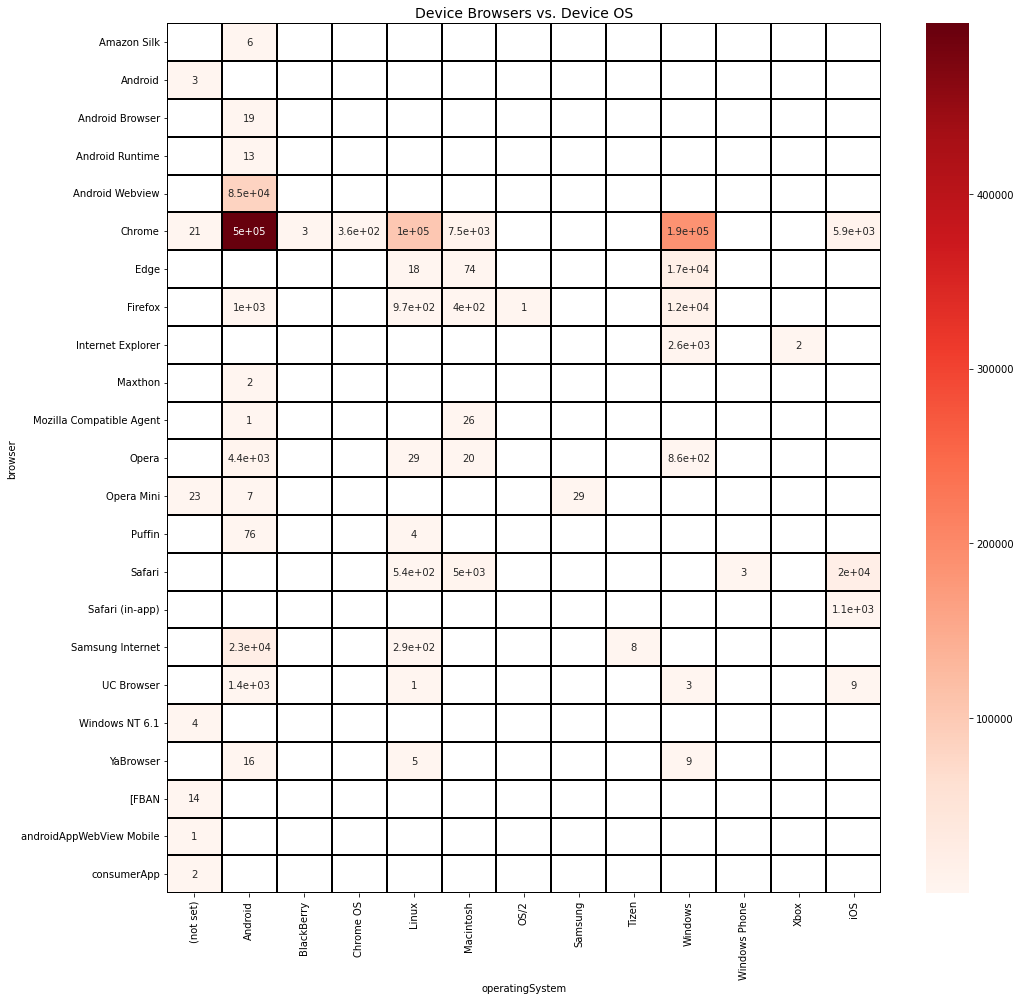

In [99]:
plot_heatmap_count(df, 'browser', 'operatingSystem',color='Reds',title="Device Browsers vs. Device OS")

Chrome with Windows are the most frequent combination, followed by Chrome with Macintosh, Chrome with Android and Safari with Macintosh and Safari with iOS.

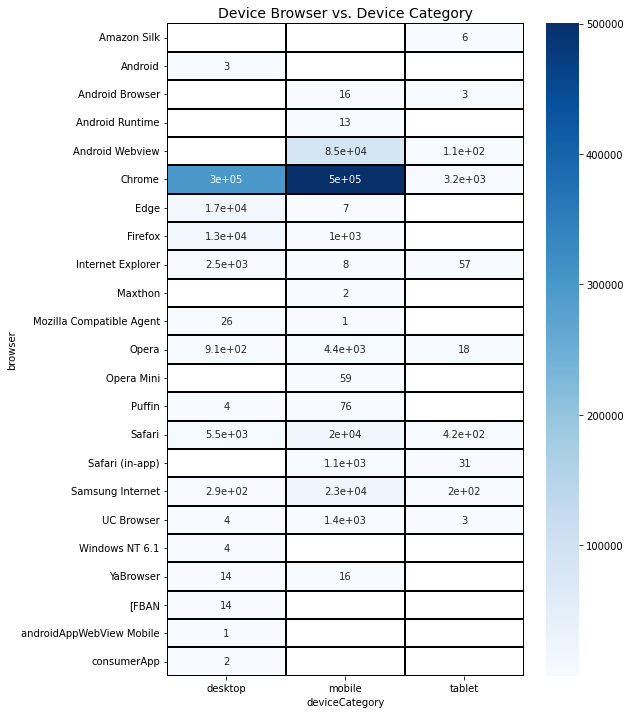

In [100]:
plot_heatmap_count(df, 'browser','deviceCategory', color='Blues',title="Device Browser vs. Device Category", height=12, width=8)

Chrome on Desktop is the most frequent browser-category device combination, followed by Chrome with mobile and Safari with desktop and with mobile.

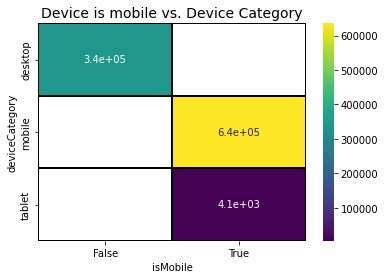

In [101]:
plot_heatmap_count(df, 'deviceCategory', 'isMobile', color='viridis',title="Device is mobile vs. Device Category", width=6, height=4)

# Geographic/Network attributes
Let's check the geographical/network attributes. As we did with the devices attributes, we will first gather all columns with geoNetwork in the name.

In [110]:
geo_cols = df[['continent', 'subContinent', 'country', 'region',
       'metro', 'city', 'cityId', 'networkDomain','networkLocation']]
print("There are ",len(geo_cols),"columns with geoNetwork attributes:\n",geo_cols)

There are  977640 columns with geoNetwork attributes:
        continent   subContinent       country            region      metro  \
0           Asia  Southern Asia         India  Himachal Pradesh  (not set)   
1           Asia  Southern Asia         India  Himachal Pradesh  (not set)   
2           Asia  Southern Asia         India            Odisha  (not set)   
3           Asia  Southern Asia         India            Odisha  (not set)   
4           Asia  Southern Asia         India            Odisha  (not set)   
...          ...            ...           ...               ...        ...   
977635      Asia  Southern Asia         India         Karnataka  (not set)   
977636      Asia  Southern Asia         India         Karnataka  (not set)   
977637      Asia  Southern Asia         India    Andhra Pradesh  (not set)   
977638      Asia   Western Asia  Saudi Arabia   Riyadh Province  (not set)   
977639      Asia  Southern Asia         India        Chandigarh  (not set)   

        

Before starting to plot the number of visits per various geoNetwork attributes, let's check if there are geoNetwork attributes that have a unique value.

In [111]:
const_geo_cols = []
for i, col in enumerate(geo_cols):
    if(len(df[col].value_counts())==1):
        const_geo_cols.append(col)
print("There are ",len(const_geo_cols),"columns with unique value for geoNetwork attributes:\n",const_geo_cols)

There are  2 columns with unique value for geoNetwork attributes:
 ['networkDomain', 'networkLocation']


These columns are candidates to be dropped from the model. For the rest of the columns, we show the number of the visits per each attribute. Note: We limit the number of shown values/categories to 50, showing the most numerous first.

In [112]:
var_cols = [item for item in geo_cols if item not in const_geo_cols]
show_features(df,var_cols)